### How many Gaia sources with G<13 and AEN>3.16 are *not* in the SGA (but should be)?

First, query the full Gaia catalog and then download the resulting table as `dr9-gaia2.fits.gz`:

https://gea.esac.esa.int/archive/

```SQL
SELECT *
FROM gaiadr2.gaia_source
WHERE phot_g_mean_mag < 13 and phot_g_mean_mag > 0 and astrometric_excess_noise > 3.16
```

In [11]:
import os
import numpy as np
import fitsio
from astropy.table import Table
from legacyhalos.misc import imagetool_inspect
from SGA.io import read_parent, in_footprint
import matplotlib.pyplot as plt
from astrometry.libkd.spherematch import match_radec

In [2]:
%matplotlib inline

In [3]:
cat = read_parent(verbose=True)
allgaia = Table(fitsio.read('/Users/ioannis/Downloads/dr9-gaia2.fits.gz', upper=True))

Read galaxy indices 0 through 533563 (N=533563) from /Users/ioannis/research/projects/SGA/sample/v3.0/SGA-parent-v3.0.fits


In [4]:
allgaia = in_footprint(allgaia)
gaia = allgaia[allgaia['IN_DESI']]

Read 132407 CCDs from /Users/ioannis/research/projects/SGA/sample/dr9/survey-ccds-90prime-dr9.kd.fits
  Found 675 galaxies in 90prime g footprint.
  Found 682 galaxies in 90prime r footprint.
  Found 0 galaxies in 90prime z footprint.
Read 208308 CCDs from /Users/ioannis/research/projects/SGA/sample/dr9/survey-ccds-mosaic-dr9.kd.fits
  Found 0 galaxies in mosaic g footprint.
  Found 0 galaxies in mosaic r footprint.
  Found 2016 galaxies in mosaic z footprint.
Read 4892653 CCDs from /Users/ioannis/research/projects/SGA/sample/dr9/survey-ccds-decam-dr9.kd.fits
  Found 10063 galaxies in decam g footprint.
  Found 10042 galaxies in decam r footprint.
  Found 10380 galaxies in decam z footprint.
Total time to find galaxies in footprint = 48.9 sec
  Identified 13569/108387 (12.52%) galaxies inside and 94818/108387 (87.48%) galaxies outside the DESI footprint.


In [26]:
print(len(gaia))

13569


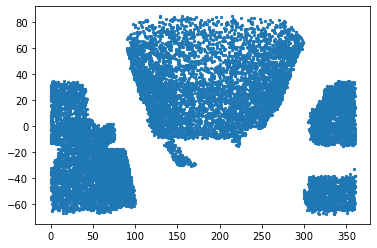

In [17]:
plt.scatter(gaia['RA'], gaia['DEC'], s=5)

In [8]:
gaia['NAME'] = ['G{}'.format(sid) for sid in gaia['SOURCE_ID']]

In [9]:
m1, m2, d12 = match_radec(gaia['RA'], gaia['DEC'], cat['RA'], cat['DEC'], 3/3600.0, nearest=True)
print(len(m1))

0


In [29]:
#imagetool_inspect(gaia[0:999])
#imagetool_inspect(gaia[1000:1999])
#imagetool_inspect(gaia[2000:2999])
#imagetool_inspect(gaia[3000:3999])
#imagetool_inspect(gaia[4000:4999])
#imagetool_inspect(gaia[5000:5999])
#imagetool_inspect(gaia[6000:6999])
#imagetool_inspect(gaia[7000:7999])
#imagetool_inspect(gaia[8000:8999])
#imagetool_inspect(gaia[9000:9999])
#imagetool_inspect(gaia[10000:10999])
#imagetool_inspect(gaia[11000:11999])
#imagetool_inspect(gaia[12000:12999])
imagetool_inspect(gaia[13000:])

Writing 569 objects to /Users/ioannis/tmp/inspect.txt
